In [29]:
import qiskit.tools.jupyter
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_distribution
from qiskit.circuit.library import MCMT

import matplotlib.pyplot as plt
import numpy as np

In [30]:
def execute_circuit(qc, shots=1024, decimal=False, reversed=False):
    
    #define backend
    device = Aer.get_backend('qasm_simulator')
    #get counts
    counts = execute(qc, device ,shots=shots).result().get_counts()
    
    if decimal:
        if reversed:
            counts = dict((int(a[::-1],2),b) for (a,b) in counts.items())
        else:
            counts = dict((int(a,2),b) for (a,b) in counts.items())
    else:
        if reversed:
            counts = dict((a[::-1],b) for (a,b) in counts.items())
        else:
            counts = dict((a,b) for (a,b) in counts.items())

    return counts

f(v1,v2,v3) = ( ¬v1 ∨ ¬v2 ∨ ¬v3) ∧ (v1 ∨ ¬v2 ∨ v3) ∧ (v1 ∨ v2 ∨ ¬v3) ∧ (v1 ∨ ¬v2 ∨ ¬v3) ∧ ( ¬v1 ∨ v2 ∨ v3)

In [31]:
expression = '''
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

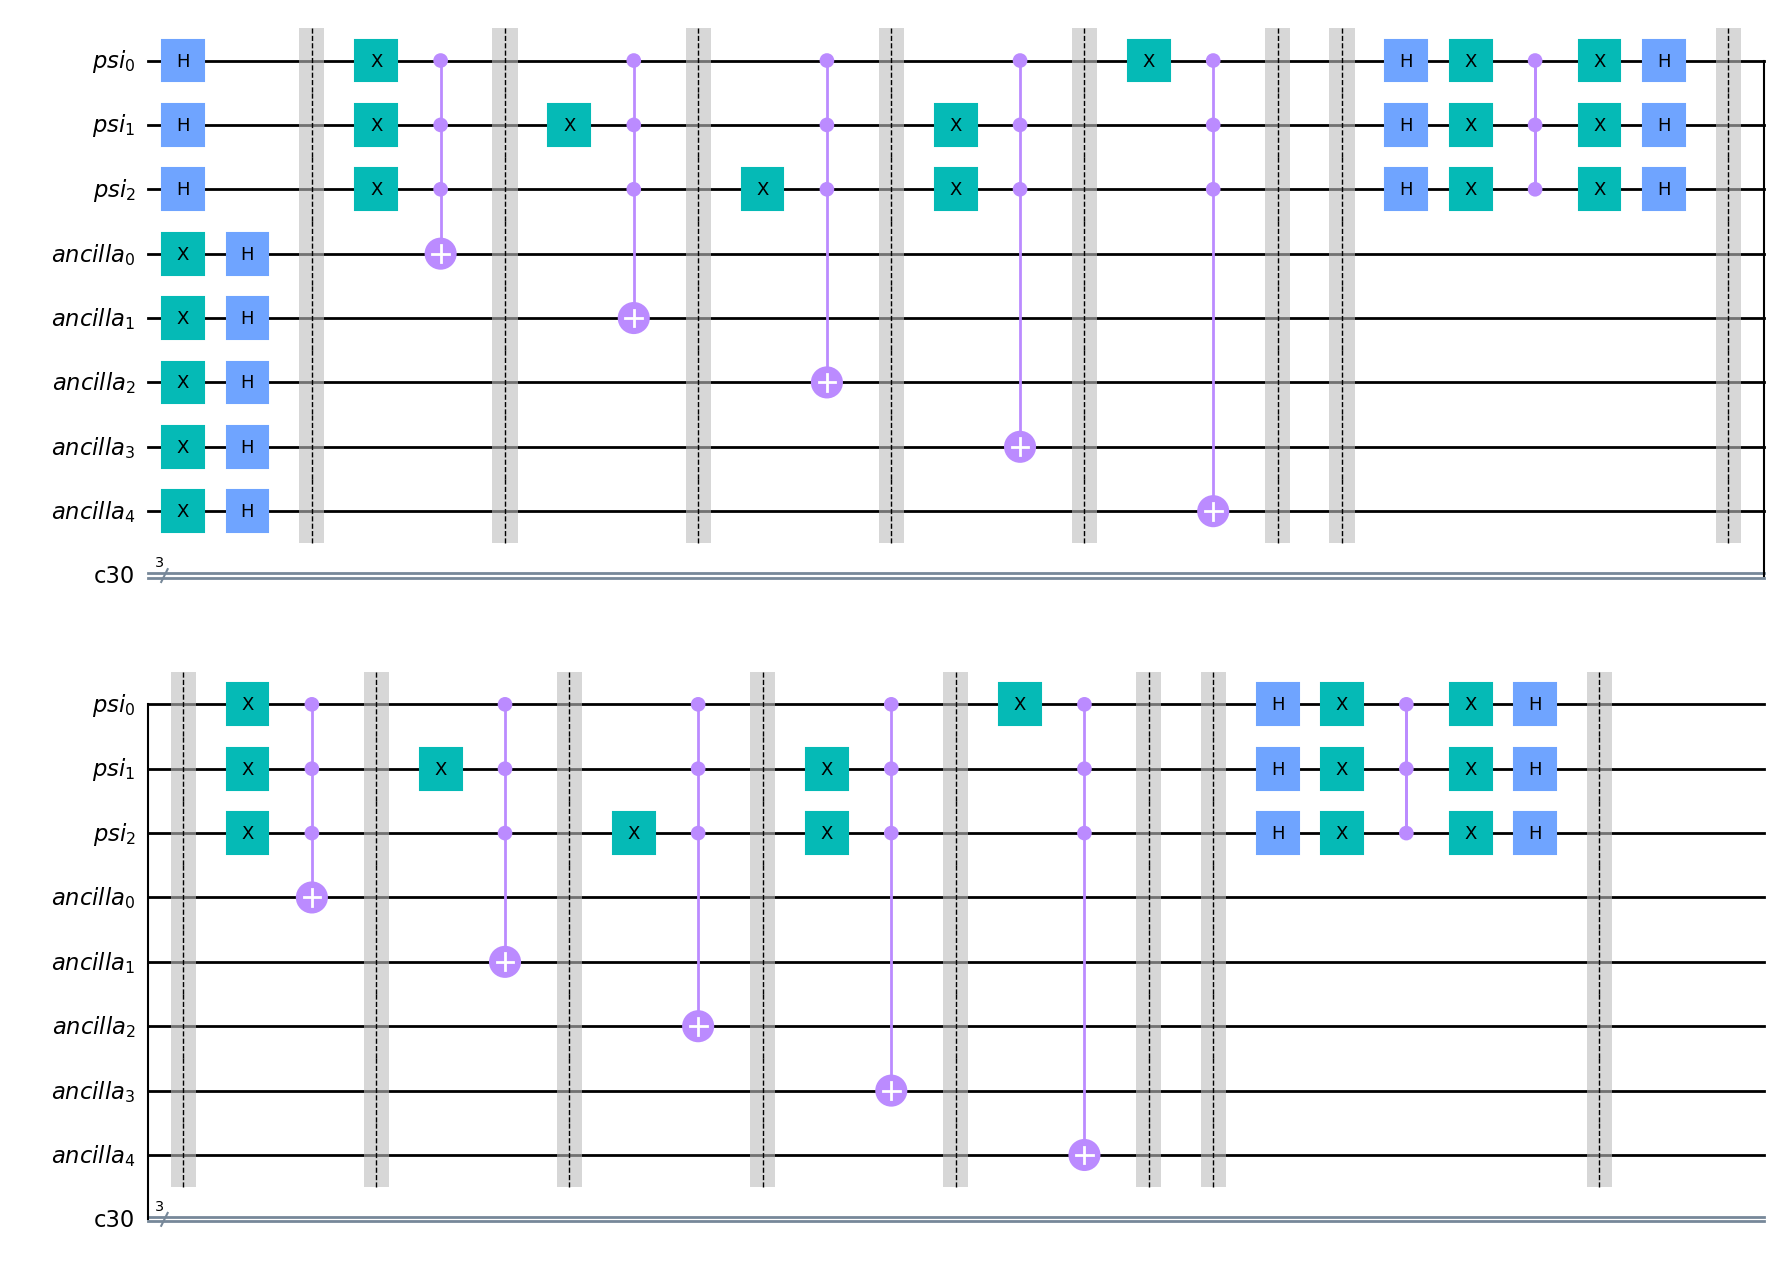

In [38]:
def func (expression):
    lines = expression.split("\n")
    n_qibits = int(lines[1].split(" ")[2])
    n_formulas = int(lines[1].split(" ")[3])

    qr = QuantumRegister(n_qibits, name = "psi")
    ancilla = QuantumRegister(n_formulas, name = "ancilla")
    cr = ClassicalRegister(n_qibits)

    qc = QuantumCircuit(qr,ancilla,cr)

    #uniform superposition qr

    qc.h(qr)
    

    #|-> state ancilla
    qc.x(ancilla)
    qc.h(ancilla)
    elements = 2**n_qibits

    iterations= int(np.floor(np.pi/4 * np.sqrt(elements)))

    for j in range(iterations):

        qc.barrier()
        #Oracle
        for i in range(n_formulas):
            #Oracle
            line = lines[i+2].split(" ")
            for j in range(n_qibits):
                if line[j][0] == '-':
                    qc.x(qr[j])
            qc.mct(qr,ancilla[i])

            qc.barrier()

        #diffusion operator

        qc.barrier()

        qc.h(qr)
        qc.x(qr)
        c3z= MCMT('cz',n_qibits-1,1)
        qc.compose(c3z,qubits=range(n_qibits),inplace=True)
        qc.x(qr)
        qc.h(qr)

        qc.barrier()
    

    #for i in range(2,len(lines)):
    return qc
func(expression).draw(output="mpl")
